Initialise the artificial time series

Artificial time series data with known ground truth. We know the X causes Y with a time delay of 10 steps.

In [2]:
#initialise the time series
x, y = [], []
x.append(0.1)
y.append(0.2)
for i in range(1, 13):
    xi = x[i-1]*(3.78-3.78*x[i-1])
    yi = y[i-1]*(3.77-3.77*y[i-1])
    x.append(xi)
    y.append(yi)

for i in range(13, 20001):
	xi = x[i-1]*(3.78-3.78*x[i-1])
	yi = y[i-1]*(3.77-3.77*y[i-1]-0.8*x[i-1-10])
	x.append(xi)
	y.append(yi)

In [3]:
# Store in a dataframe
time_series_df = pd.DataFrame(columns=['t', 'x', 'y'])
time_series_df['t'] = range(0, 20001)
time_series_df['x'] = x
time_series_df['y'] = y


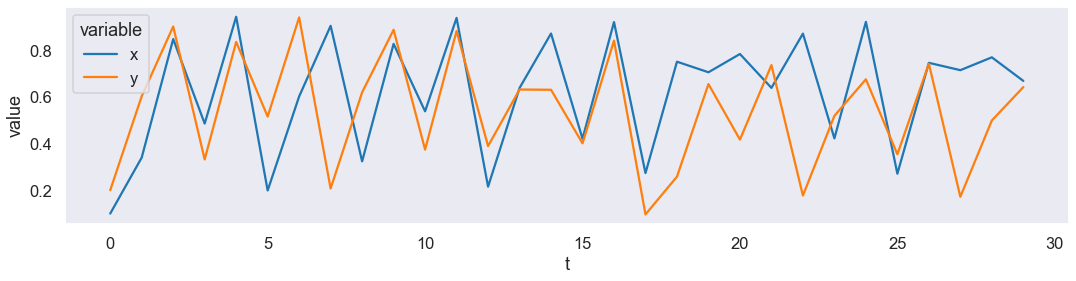

In [66]:
# Plot the first 30 steps of the time series
sns.set_style('dark')
sns.set_context('talk')

fig, ax = plt.subplots(figsize=(18, 4))

time_series_df_melted = pd.melt(time_series_df.head(30), id_vars= 't', value_vars=['x', 'y'])

fig = sns.lineplot(data=time_series_df_melted,
                   x = 't',
                   y = 'value',
                   hue = 'variable'
                   )

Test a python package for reservoir computing.

In [7]:
from pyrcn.echo_state_network import ESNRegressor

In [8]:
# Split data in train and test
X_train = np.array(x[:15000]).reshape(-1, 1)
y_train = np.array(y[:15000])

X_test = np.array(x[15000:]).reshape(-1, 1)
y_test = np.array(y[15000:])

In [9]:
# Initialise the regressor
eg = ESNRegressor()

In [10]:
# Fit the regresor
reg.fit(X=X_train, y=y_train)
# Predict Ys
y_pred = reg.predict(X_test)

In [34]:
# Store in a dataframe all but the first twenty time steps
out_df = pd.DataFrame(columns=['y_test', 'y_pred'])
out_df['y_test'] = y_test[20:]
out_df['y_pred'] = y_pred[20:]

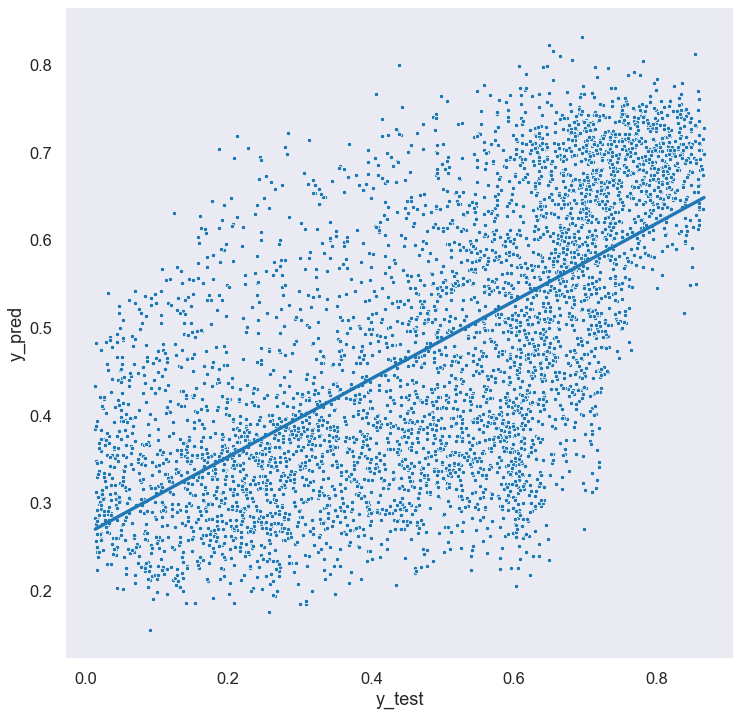

In [62]:
# Plot the scatter plot
sns.set_style('dark')
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(12, 12))

fig = sns.scatterplot(data = out_df,
                      x = 'y_test',
                      y = 'y_pred',
                      marker = '.'
                      )
# Add the regression line
fig = sns.regplot(data = out_df,
                  x = 'y_test',
                  y = 'y_pred',
                  marker = '.',
                  scatter = False,
                  fit_reg = True,
                  ci = False
                  )

In [71]:
y_test.shape, y_pred.shape

((5001,), (5001,))

In [36]:
# Calculate Pearson's coefficient
np.corrcoef(y_test[20:], y_pred[20:])

array([[1.      , 0.655138],
       [0.655138, 1.      ]])

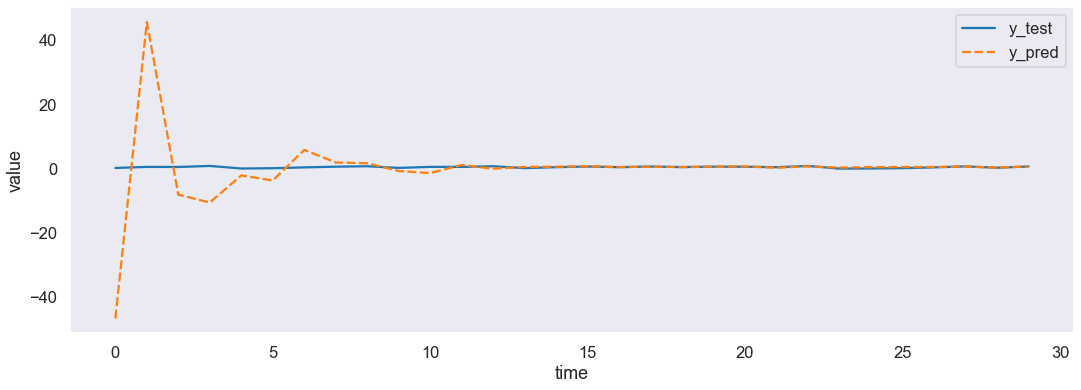

In [54]:
#Why did we skip the first 20 steps? Well, let's look what happens there.

out_df2 = pd.DataFrame(columns=['y_test', 'y_pred'])
out_df2['y_test'] = y_test[:30]
out_df2['y_pred'] = y_pred[:30]

fig, ax = plt.subplots(figsize=(18, 6))

fig = sns.lineplot(data = out_df2)

ax.set_ylabel('value')
ax.set_xlabel('time')
ax.legend()

We see a large overshoot at the very beginning, which later stabilises. What causes this? We do not know.

Text(0.5, 0, 'time')

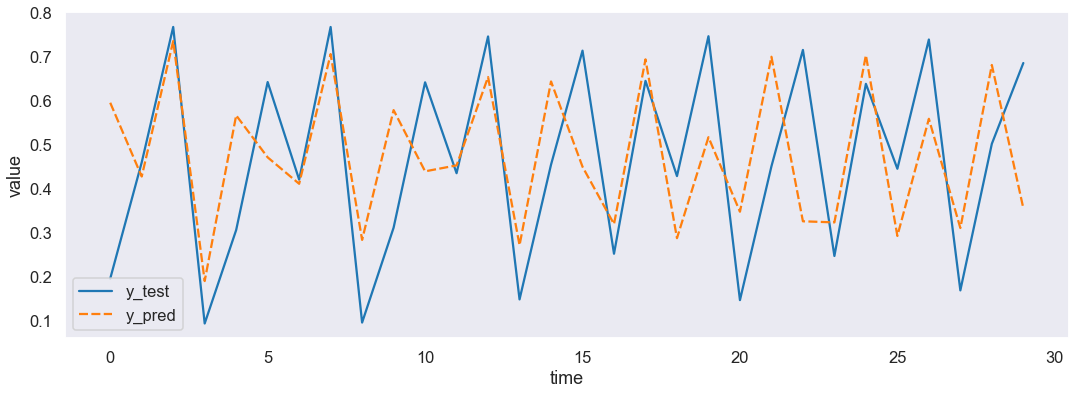

In [70]:
#Further down the line, the true and the predicted time series are correlated

out_df2 = pd.DataFrame(columns=['y_test', 'y_pred'])
out_df2['y_test'] = y_test[100:130]
out_df2['y_pred'] = y_pred[100:130]

fig, ax = plt.subplots(figsize=(18, 6))

fig = sns.lineplot(data = out_df2)

ax.set_ylabel('value')
ax.set_xlabel('time')

Unanswered questions:
what causes the misalignment at the beginning?
what is the time-lag in real world data based on brain connections?

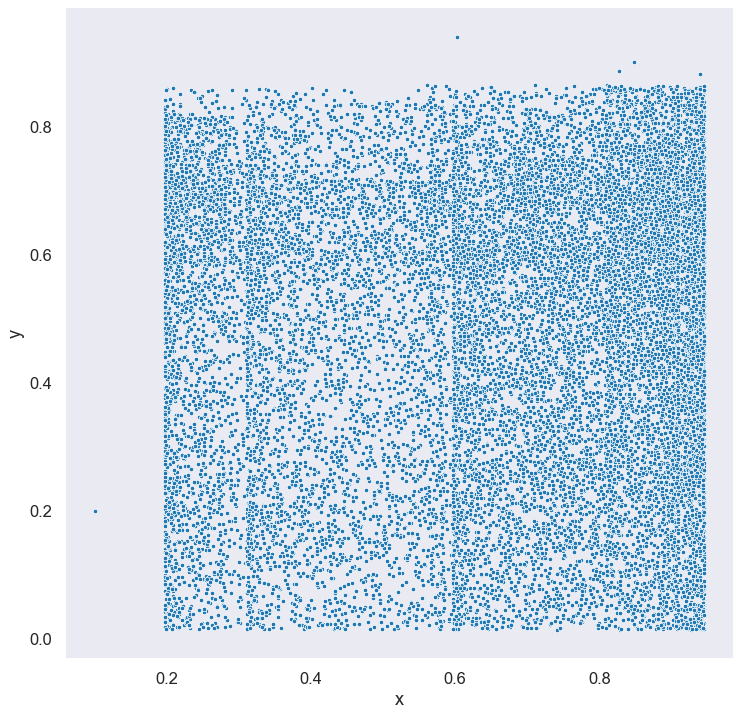

In [68]:
fig, ax = plt.subplots(figsize=(12, 12))

fig = sns.scatterplot(data=time_series_df,
                      x = 'x',
                      y = 'y',
                      marker = '.',
                      )